<H4>The purpose of this exercise is to predict the win place for the PUBG game players 
Data Source: Kaggle.com</H4>


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, r2_score

### Reading the Dataset

In [72]:
train = pd.read_csv("train_V2.csv")

### Initial Exploration

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [74]:
train.head(50)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.000,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.000,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,0,1,1,18.440,1395,squad-fpp,28,28,1418,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,1262,0,0,0.000,1316,squad-fpp,28,28,-1,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.000,1967,solo-fpp,96,92,-1,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,0,0,0,0.000,1375,squad,28,27,1493,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,0,0,0,0.000,1930,squad,29,27,1349,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [75]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [76]:
train.shape

(4446966, 29)

### Null Value Imputation

In [77]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [78]:
null_data = train[train.isnull().any(axis = 1)]

In [79]:
null_data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [80]:
# There is only one Null Value in the whole dataset, therefore we choose to delete it
train.drop(2744604, inplace=True)

In [11]:
train.shape

(4446965, 29)

### Anamolies

#### A) Total Distance Travelled == 0 and Kills > 0

In [81]:
#Create new feature totalDistance
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
# Create feature killsWithoutMoving
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [82]:
# Check players who kills without moving
display(train[train['killsWithoutMoving'] == True].shape)

(1535, 31)

In [83]:
#Since there can't be any kills without moving --> we delete it
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

In [84]:
train.shape

(4445430, 31)

#### B) Kill Distribution OUtliers 

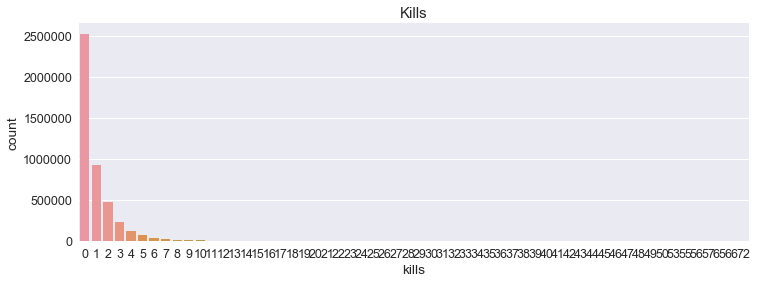

In [86]:
# Plot the distribution of kills
plt.figure(figsize=(12,4))
sns.countplot(data=train, x=train['kills']).set_title('Kills')
plt.show()

In [87]:
# Players who got more than 50 kills
display(train[train['kills'] > 50].shape)


(13, 31)

In [88]:
# Remove outliers
train.drop(train[train['kills'] > 50].index, inplace=True)

In [89]:
train.shape

(4445417, 31)

#### C) Walk Distance Outliers

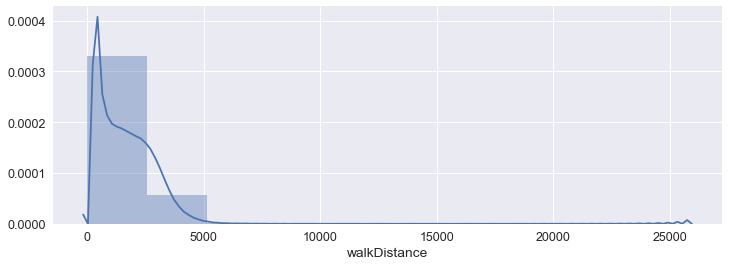

In [90]:
plt.figure(figsize=(12,4))
sns.distplot(train['walkDistance'], bins=10)
plt.show()

In [91]:
display(train[train['walkDistance'] >= 10000].shape)

(219, 31)

In [92]:
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)

In [93]:
train.shape

(4445198, 31)

#### D) Wrong KillPlace

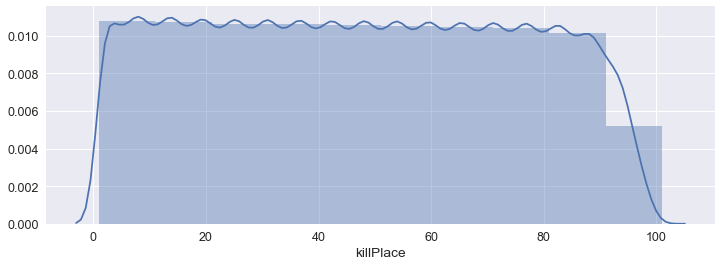

In [94]:
# Plot the distribution of killPlace
plt.figure(figsize=(12,4))
sns.distplot(train['killPlace'], bins=10)
plt.show()

In [95]:
train.drop(train[train['killPlace']>100].index, inplace=True)

In [96]:
train.shape

(4445197, 31)

### Data Exploration

#### A) Exploring Game Modes:

In [97]:
game_modes = train.groupby(by = 'matchType').size()
game_modes = game_modes.reset_index()
game_modes.columns = ['matchType','count']
game_modes.sort_values(by = ['count'] , inplace = True)
print(game_modes)

           matchType    count
6         normal-duo      193
8        normal-solo      281
1           crashtpp      371
10      normal-squad      453
4           flarefpp      718
9    normal-solo-fpp     1497
5           flaretpp     2505
7     normal-duo-fpp     5409
0           crashfpp     6287
11  normal-squad-fpp    16226
12              solo   181907
2                duo   313577
13          solo-fpp   536580
14             squad   626504
3            duo-fpp   996627
15         squad-fpp  1756062


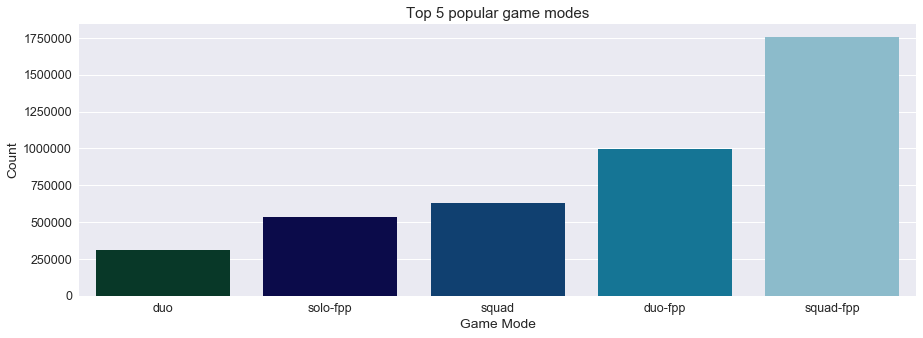

In [99]:
### Visualizing the top 5 Games:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=game_modes.tail(),x='matchType',y='count',palette='ocean')
ax.set_title('Top 5 popular game modes',fontsize=15)
ax.set_xlabel('Game Mode')
ax.set_ylabel('Count')
plt.show()

In [29]:
### Exploring the relationship of the Target variable with matchtype
group1 = train[["winPlacePerc","matchType"]].groupby("matchType").mean().sort_values('matchType',ascending=False)

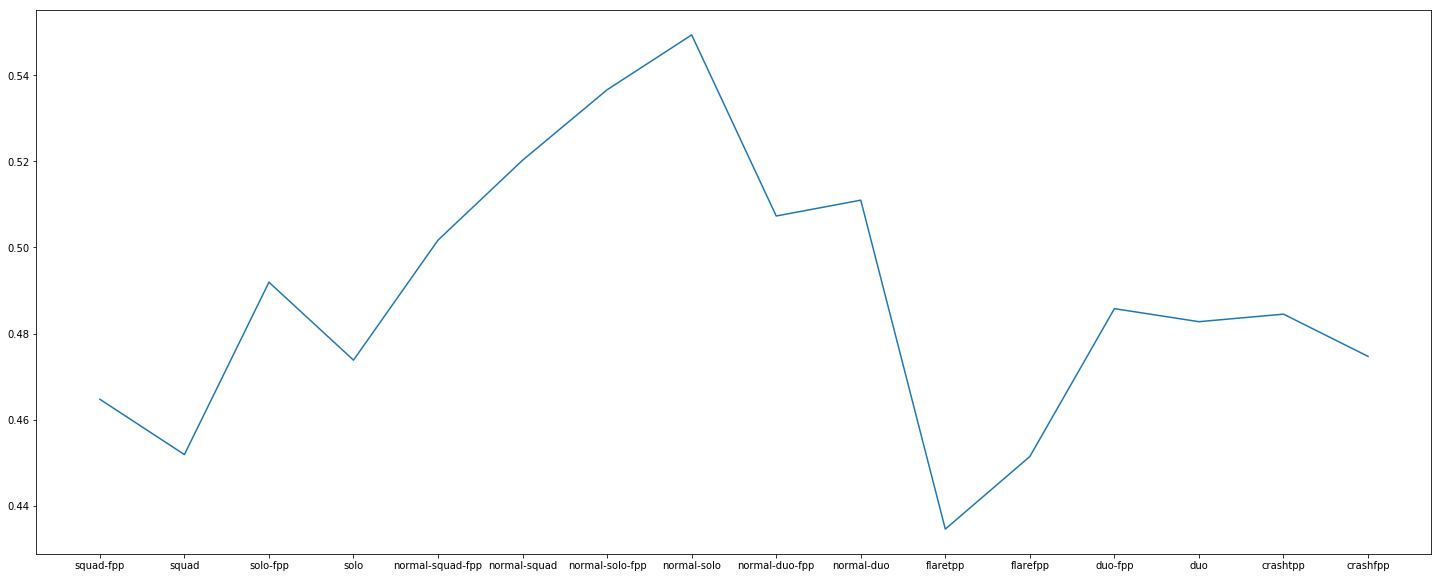

In [30]:
fig,ax=plt.subplots(figsize=(25,10))
plt.plot(group1.index,group1['winPlacePerc'])
plt.show()

#### B) HeadshotKills

In [32]:
a =train.groupby("headshotKills").mean().sort_values('headshotKills',ascending=False)
a

,assists,boosts,damageDealt,DBNOs,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
headshotKills,,,,,,,,,,,,,,,,,,,,,,,,,,
42,2.000000,2.000000,4495.000000,0.000000,2.000000,1.000000,1000.000000,50.000000,7.000000,324.200000,1136.000000,30.000000,17.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1021.000000,15.000000,1500.000000,1.000000,1021.000000,False
40,1.000000,0.000000,4033.000000,0.000000,0.000000,1.000000,1000.000000,42.000000,5.000000,266.200000,844.000000,8.000000,8.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,718.300000,16.000000,1500.000000,1.000000,718.300000,False
39,1.000000,0.000000,3695.000000,0.000000,2.000000,1.000000,0.000000,41.000000,8.000000,212.600000,886.000000,17.000000,13.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,972.800000,21.000000,0.000000,1.000000,972.800000,False
35,1.000000,2.000000,3680.000000,0.000000,0.000000,1.000000,1000.000000,40.000000,20.000000,621.800000,799.000000,10.000000,10.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1180.000000,2.000000,1500.000000,1.000000,1180.000000,False
34,4.000000,0.000000,4104.500000,20.000000,3.500000,1.000000,0.000000,41.500000,9.500000,371.350000,754.000000,10.500000,10.500000,1500.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,390.350000,14.500000,0.000000,1.000000,390.350000,False
31,3.000000,4.000000,3645.000000,0.000000,10.000000,2.000000,1000.000000,40.000000,9.000000,166.600000,844.000000,8.000000,8.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,988.700000,10.000000,1500.000000,0.857100,988.700000,False
27,2.500000,5.000000,3873.500000,0.000000,2.500000,1.000000,0.000000,41.000000,5.500000,313.950000,1310.500000,8.000000,8.000000,1500.000000,0.000000,53.300000,0.000000,0.000000,0.500000,0.000000,779.200000,27.500000,0.000000,1.000000,832.500000,False
26,4.000000,9.500000,3486.000000,16.000000,2.500000,1.000000,806.500000,34.500000,7.500000,210.250000,1295.500000,17.500000,16.500000,749.500000,0.000000,2293.000000,0.000000,6.240000,0.000000,0.000000,2291.520000,11.000000,757.500000,0.928550,4590.760000,False
23,2.666667,0.666667,2646.000000,0.000000,0.000000,1.666667,333.333333,27.000000,6.000000,410.144667,1001.333333,11.666667,9.000000,999.666667,0.000000,1180.333333,0.000000,0.000000,0.000000,0.000000,880.966667,11.000000,500.000000,0.966667,2061.300000,False


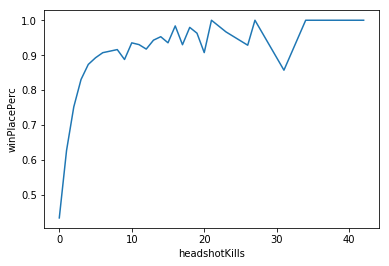

In [33]:
plt.plot(a.index,a['winPlacePerc'])
plt.xlabel('headshotKills')
plt.ylabel('winPlacePerc')
plt.show()

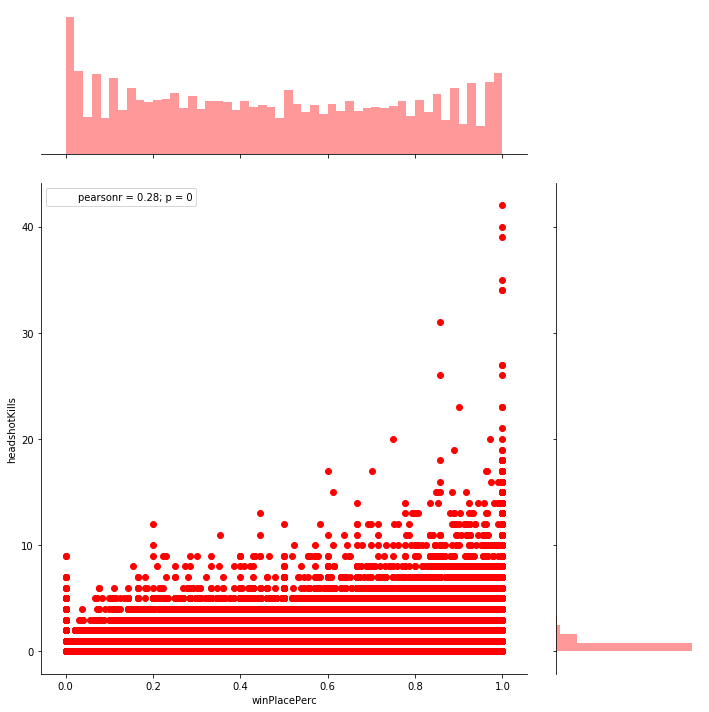

In [34]:
sns.jointplot(x="winPlacePerc", y="headshotKills", data= train, size=10, ratio=3, color="r")
plt.show()

#### C) PlayerJoined

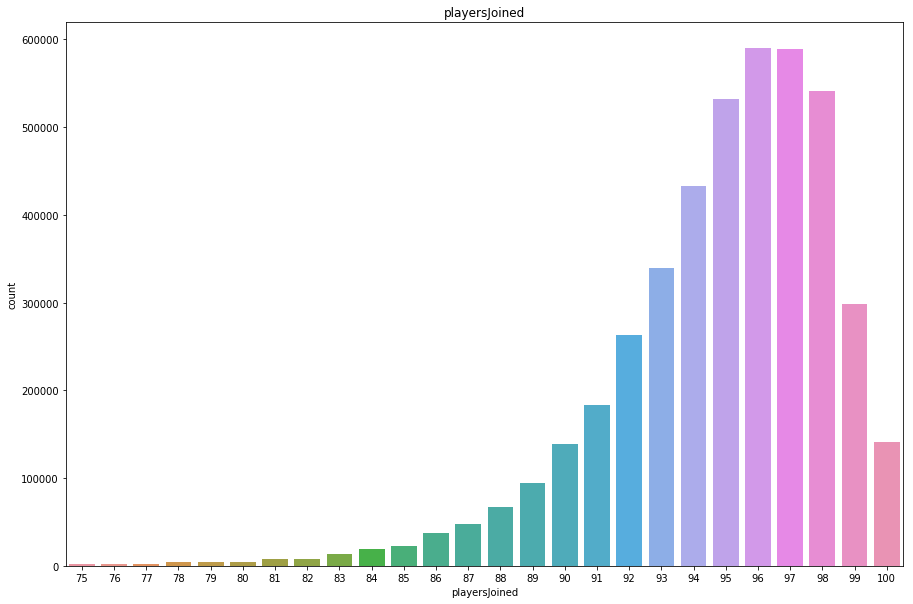

In [35]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.show()

#### D) Boosts

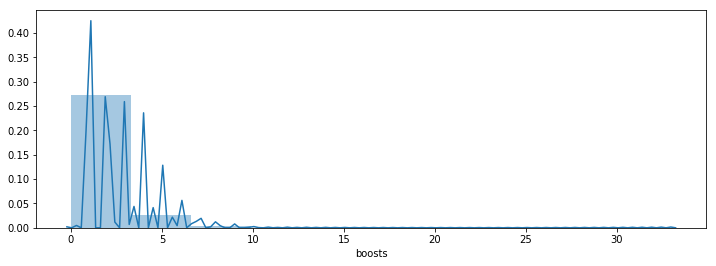

In [36]:
# Plot the distribution of boosts
plt.figure(figsize=(12,4))
sns.distplot(train['boosts'], bins=10)
plt.show()

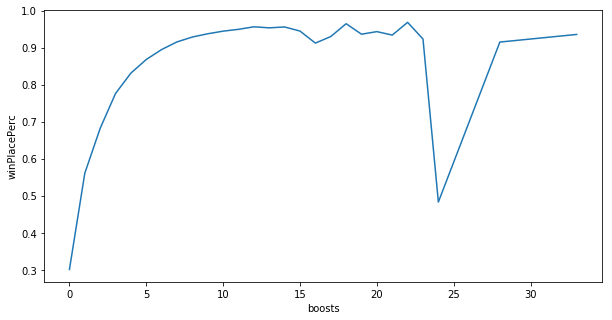

In [37]:
### Visualizing its relation with the target variable
group1 = train[["winPlacePerc","boosts"]].groupby("boosts").mean().sort_values('boosts',ascending=False)
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(group1.index,group1['winPlacePerc'])
plt.xlabel('boosts')
plt.ylabel('winPlacePerc')
plt.show()

#### E) weaponsAcquired

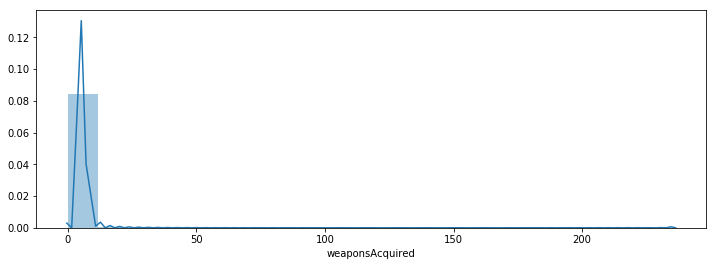

In [38]:
# Plot the distribution of boosts
plt.figure(figsize=(12,4))
sns.distplot(train['weaponsAcquired'], bins = 20)
#sns.barplot(train['weaponsAcquired'])
plt.show()

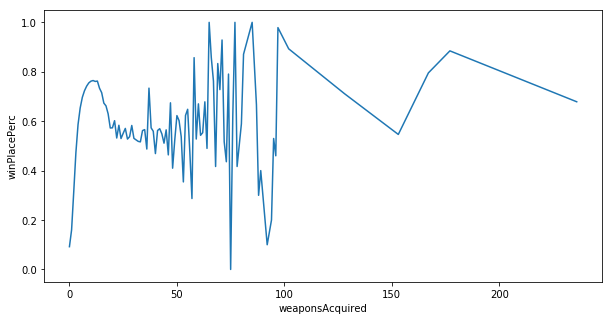

In [39]:
### Visualizing its relation with the target variable
group1 = train[["winPlacePerc","weaponsAcquired"]].groupby("weaponsAcquired").mean().sort_values('weaponsAcquired',ascending=False)
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(group1.index,group1['winPlacePerc'])
plt.xlabel('weaponsAcquired')
plt.ylabel('winPlacePerc')
plt.show()

#### F) Heals

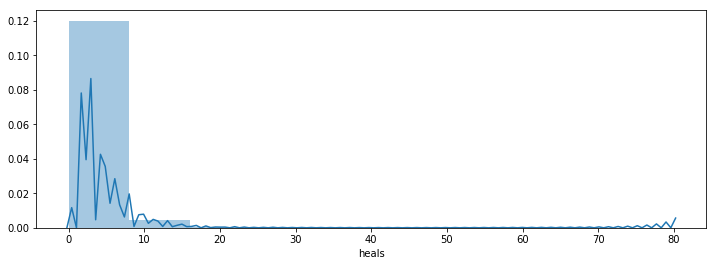

In [40]:
# Plot the distribution of boosts
plt.figure(figsize=(12,4))
sns.distplot(train['heals'], bins = 10)

plt.show()

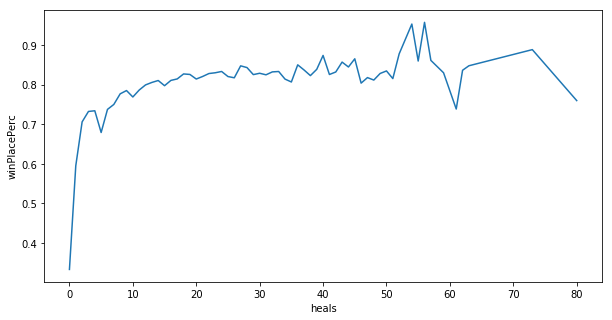

In [41]:
### Visualizing its relation with the target variable
group1 = train[["winPlacePerc","heals"]].groupby("heals").mean().sort_values('heals',ascending=False)
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(group1.index,group1['winPlacePerc'])
plt.xlabel('heals')
plt.ylabel('winPlacePerc')
plt.show()

#### G) Correlation Matrix

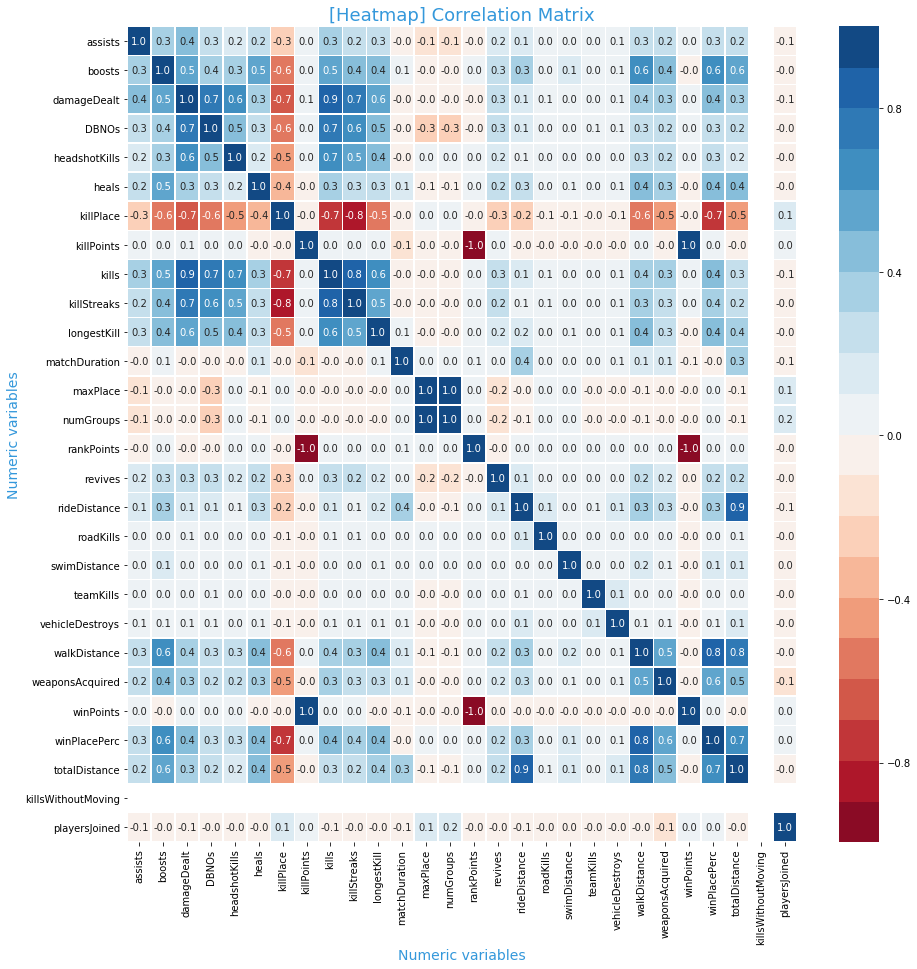

In [42]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

ax.set_xlabel('Numeric variables', size=14, color="#3498DB")
ax.set_ylabel('Numeric variables', size=14, color="#3498DB")
ax.set_title('[Heatmap] Correlation Matrix', size=18, color="#3498DB")

plt.show()

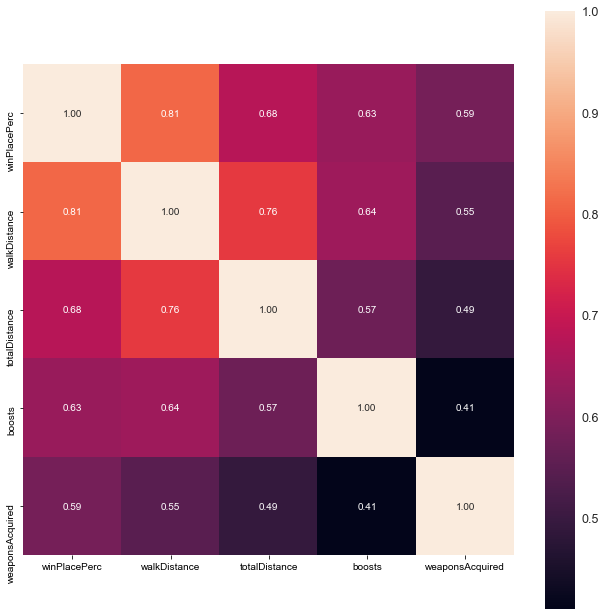

In [43]:
#Zooming in top 5 positive correlated variables
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### H) Scatterplot with the correlated values

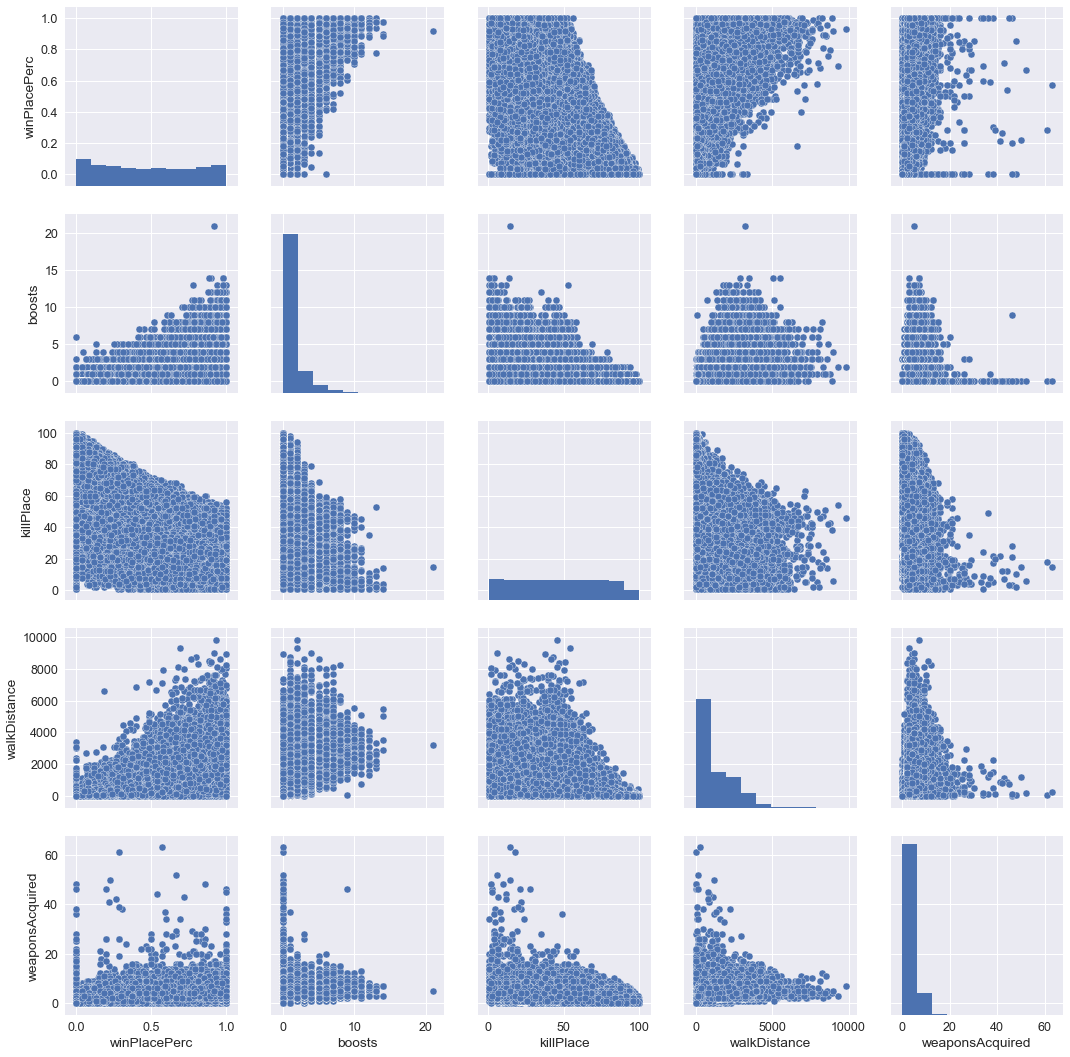

In [44]:
exp = train[:100000]
a = sns.pairplot(exp, size = 3 , vars = ['winPlacePerc', 'boosts', 'killPlace','walkDistance','weaponsAcquired'])

### Data Pre-processing

In [100]:
train = train.assign(team_size = train.groupby('groupId').groupId.transform('count'))
train = train.assign(max_team_size = train.groupby('matchId').team_size.transform('max'))

In [101]:
# One hot encode matchType
train = pd.get_dummies(train, columns=['matchType'])

# Take a look at the encoding
matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [102]:
# Turn groupId and match Id into categorical types
train['groupId'] = train['groupId'].astype('category')
train['matchId'] = train['matchId'].astype('category')

# Get category coding for groupId and matchID
train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

# Get rid of old columns
df = train
train.drop(columns=['groupId', 'matchId'], inplace=True)

# Lets take a look at our newly created features
train[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,613665,30085
1,827677,32751
2,843368,3143
3,1340220,45260
4,1757543,20531


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445197 entries, 0 to 4446965
Data columns (total 48 columns):
Id                            object
assists                       int64
boosts                        int64
damageDealt                   float64
DBNOs                         int64
headshotKills                 int64
heals                         int64
killPlace                     int64
killPoints                    int64
kills                         int64
killStreaks                   int64
longestKill                   float64
matchDuration                 int64
maxPlace                      int64
numGroups                     int64
rankPoints                    int64
revives                       int64
rideDistance                  float64
roadKills                     int64
swimDistance                  float64
teamKills                     int64
vehicleDestroys               int64
walkDistance                  float64
weaponsAcquired               int64
winPoints   

### Feature Engineering

In [104]:
X = train.drop(['Id','winPlacePerc'], axis = 1)
y = train['winPlacePerc']


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [51]:
forest = RandomForestRegressor(n_estimators=100, random_state=0)

In [52]:
X_train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,totalDistance,killsWithoutMoving,playersJoined,team_size,max_team_size,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
4109610,0,1,253.30,1,1,1,20,1590,2,2,9.966,1388,46,46,-1,0,0.0,0,0.0,0,0,193.90,2,1530,193.90,False,92,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1101198,38830
31461,0,1,254.50,3,2,0,21,0,2,2,9.888,1161,28,28,1525,2,0.0,0,0.0,0,0,372.10,2,0,372.10,False,100,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,764503,30788
582766,0,3,54.45,0,0,1,46,0,0,0,0.000,1295,28,27,1500,0,0.0,0,0.0,0,0,2901.00,6,0,2901.00,False,98,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,230797,33112
3042538,0,0,79.95,0,0,0,78,1024,0,0,0.000,1388,43,39,-1,0,0.0,0,0.0,0,0,65.71,1,1507,65.71,False,85,3,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1743361,29653
2192711,0,0,100.00,0,1,0,42,0,1,1,0.000,1449,96,93,1532,0,0.0,0,0.0,0,0,349.90,1,0,349.90,False,96,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,369220,3188


In [53]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
forest.score(X_test,y_test)

0.9384701721336738

In [55]:
feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
walkDistance,6.748760e-01
killPlace,1.815608e-01
totalDistance,2.543168e-02
playersJoined,2.169474e-02
matchDuration,1.317076e-02
numGroups,8.071992e-03
team_size,7.325827e-03
kills,7.020459e-03
matchId_cat,5.449054e-03
groupId_cat,5.418396e-03


#### Choosing the most important features for our evaluation

In [56]:
X.drop(columns = ['matchType_squad','revives','revives','headshotKills','swimDistance','matchType_squad-fpp','matchType_solo-fpp','matchType_duo-fpp',
                 'teamKills','matchType_duo','matchType_solo','matchType_normal-squad-fpp','vehicleDestroys','roadKills',
                 'matchType_normal-squad-fpp','vehicleDestroys','roadKills','matchType_normal-duo-fpp','matchType_crashfpp','matchType_normal-solo-fpp','matchType_flaretpp','matchType_normal-squad',
                 'matchType_normal-solo','matchType_normal-duo',
                'matchType_flarefpp','matchType_crashtpp','killsWithoutMoving'], inplace = True)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [58]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
forest.score(X_test,y_test)

0.937745837476903

### LightGBM Model for Prediction

In [106]:
df1=train.drop(columns = ['Id','matchType_squad','revives','revives','headshotKills','swimDistance','matchType_squad-fpp','matchType_solo-fpp','matchType_duo-fpp',
                 'teamKills','matchType_duo','matchType_solo','matchType_normal-squad-fpp','vehicleDestroys','roadKills',
                 'matchType_normal-squad-fpp','vehicleDestroys','roadKills','matchType_normal-duo-fpp','matchType_crashfpp','matchType_normal-solo-fpp','matchType_flaretpp','matchType_normal-squad',
                 'matchType_normal-solo','matchType_normal-duo',
                'matchType_flarefpp','matchType_crashtpp','killsWithoutMoving'], axis = 1)

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445197 entries, 0 to 4446965
Data columns (total 24 columns):
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
maxPlace           int64
numGroups          int64
rankPoints         int64
rideDistance       float64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
totalDistance      float64
team_size          int64
max_team_size      int64
groupId_cat        int32
matchId_cat        int32
dtypes: float64(6), int32(2), int64(16)
memory usage: 813.9 MB


In [62]:
TRAIN_SIZE = 0.9
EARLY_STOP_ROUNDS = 10
RANDOM_STATE = 212
TARGET = 'winPlacePerc'
EXCLUDE_COLS =['Id']
CATEGORICAL_COLS = ['matchId','groupId']

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445197 entries, 0 to 4446965
Data columns (total 48 columns):
Id                            object
assists                       int64
boosts                        int64
damageDealt                   float64
DBNOs                         int64
headshotKills                 int64
heals                         int64
killPlace                     int64
killPoints                    int64
kills                         int64
killStreaks                   int64
longestKill                   float64
matchDuration                 int64
maxPlace                      int64
numGroups                     int64
rankPoints                    int64
revives                       int64
rideDistance                  float64
roadKills                     int64
swimDistance                  float64
teamKills                     int64
vehicleDestroys               int64
walkDistance                  float64
weaponsAcquired               int64
winPoints   

In [110]:
def train_validation(df, train_size=TRAIN_SIZE):
    
    unique_games = df.matchId_cat.unique()
    train_index = round(int(unique_games.shape[0]*train_size))
    
    np.random.shuffle(unique_games)
    
    train_id = unique_games[:train_index]
    validation_id = unique_games[train_index:]
    
    train = df[df.matchId_cat.isin(train_id)]
    validation = df[df.matchId_cat.isin(validation_id)]
    print(unique_games)
    return train, validation
    

In [111]:
train_val, validation = train_validation(df1)

[15187 18871  5322 ... 14610 25443 39836]


In [112]:
train_weights = 1/train_val.team_size
validation_weights = (1/validation.team_size)

In [113]:
X_train = train_val.drop(TARGET, axis = 1)
X_test = validation.drop(TARGET, axis = 1)

y_train = train_val[TARGET]
y_test = validation[TARGET]

In [115]:
time_0 = datetime.datetime.now()
lgbm = LGBMRegressor(objective='mae', n_estimators=250,  
                     learning_rate=0.3, num_leaves=200, 
                     n_jobs=-1,  random_state=RANDOM_STATE, verbose=0)

lgbm.fit(X_train, y_train, sample_weight=train_weights,
         eval_set=[(X_test, y_test)], 
         eval_sample_weight=[validation_weights], 
         eval_metric='mae', early_stopping_rounds=EARLY_STOP_ROUNDS, 
         verbose=0)

time_1  = datetime.datetime.now()


print('Training took {} seconds. Best iteration is {}'.format((time_1 - time_0).seconds, lgbm.best_iteration_))

Training took 286 seconds. Best iteration is 103


In [116]:
print('Mean Absolute Error is {:.5f}'.format(mean_absolute_error(y_test, lgbm.predict(X_test, num_iteration=lgbm.best_iteration_), sample_weight=validation_weights)))
print('R2 score is {:.2%}'.format(r2_score(y_test, lgbm.predict(X_test, num_iteration=lgbm.best_iteration_), sample_weight=validation_weights)))

Mean Absolute Error is 0.05349
R2 score is 93.49%


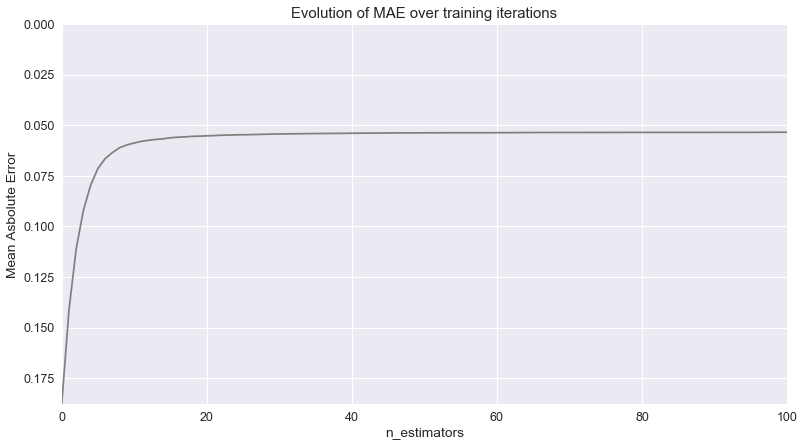

In [117]:
def plot_training(lgbm):
    
    fig, ax = plt.subplots(figsize=(13,7))
    losses = lgbm.evals_result_['valid_0']['l1']
    ax.set_ylim(np.max(losses), 0)
    ax.set_xlim(0,100)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('Mean Asbolute Error')
    ax.set_title('Evolution of MAE over training iterations')
    ax.plot(losses, color='grey');
    
plot_training(lgbm)

In [120]:
results = validation.copy()
results = results.assign(predicted_player_rank=lgbm.predict(X_test, num_iteration=lgbm.best_iteration_))
print('The minimum predicted ranking is {}, the maximum is {}'.format(results.predicted_player_rank.min(), results.predicted_player_rank.max()))

The minimum predicted ranking is -0.14108150117268486, the maximum is 1.1127632464244859


In [121]:
results.predicted_player_rank = results.predicted_player_rank.clip(0, 1)
print('The minimum predicted ranking is {}, the maximum is {}'.format(results.predicted_player_rank.min(), results.predicted_player_rank.max()))

The minimum predicted ranking is 0.0, the maximum is 1.0


In [122]:
print('R2 score is {:.2%}'.format(r2_score(y_test, results.predicted_player_rank, sample_weight=validation_weights)))
print('Mean Absolute Error is {:.5f}'.format(mean_absolute_error(y_test, results.predicted_player_rank, sample_weight=validation_weights)))

R2 score is 93.49%
Mean Absolute Error is 0.05344


In [126]:
results = results.assign(predicted_team_rank_max=results.groupby('groupId_cat').predicted_player_rank.transform('max'))
results = results.assign(predicted_team_rank_mean=results.groupby('groupId_cat').predicted_player_rank.transform('mean'))

print('Using team maximum predicted ranking:')
print('R2 score is {:.2%}'.format(r2_score(y_test, results.predicted_team_rank_max.clip(0, 1), sample_weight=validation_weights)))
print('Mean Absolute Error is {:.5f}'.format(mean_absolute_error(y_test, results.predicted_team_rank_max, sample_weight=validation_weights)))

print('\nUsing team average predicted ranking:')
print('R2 score is {:.2%}'.format(r2_score(y_test, results.predicted_team_rank_mean.clip(0, 1), sample_weight=validation_weights)))
print('Mean Absolute Error is {:.5f}'.format(mean_absolute_error(y_test, results.predicted_team_rank_mean, sample_weight=validation_weights)))

Using team maximum predicted ranking:
R2 score is 93.44%
Mean Absolute Error is 0.05469

Using team average predicted ranking:
R2 score is 95.10%
Mean Absolute Error is 0.04792


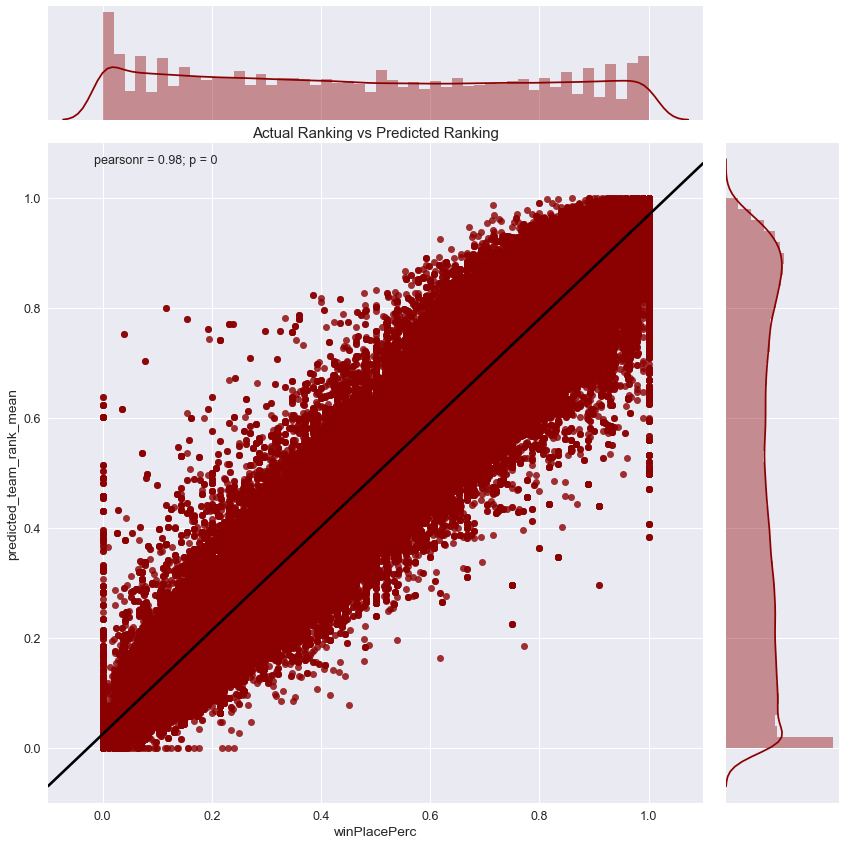

In [128]:
sns.jointplot(y_test, results.predicted_team_rank_mean,
              kind='reg', size=12,
              xlim=(-0.1, 1.1), ylim=(-0.1, 1.1),
              color='darkred', scatter_kws={'edgecolor':'w'}, line_kws={'color':'black'});
plt.title('Actual Ranking vs Predicted Ranking');